In [1]:
import numpy as np
import math as m
import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from qiskit import *
import qiskit
from qiskit import assemble,Aer
from qiskit.visualization import *
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
import torch.optim as optim
from tqdm import trange
import matplotlib.pyplot as plt
from collections.abc import Iterable
import functools
import os
from qiskit.providers.aer.noise import amplitude_damping_error

from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ, transpile


/home/lucas/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
noise_model = NoiseModel()
# Perform a noise simulation
gamma = 0.1  # Taxa de amortecimento

# Criando o erro de amortecimento de amplitude para um qubit
error = amplitude_damping_error(gamma)

# Adicionando o erro ao modelo de ruído para todos os gates u1, u2, u3
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])

backend = AerSimulator(noise_model=noise_model)





In [19]:
q = QuantumRegister(2,name='q')
c = ClassicalRegister(2,name='c')
qc = QuantumCircuit(q,c)

qc.h(0)
qc.cx(0,1)

qc.measure([0,1],[0,1])

backend = AerSimulator()




In [51]:
qc.draw('mpl').savefig('circuitRef.pdf')

In [29]:
transpiled_circ = transpile(qc, backend)



qobj = assemble(transpiled_circ,shots=1024)

job = backend.run(qobj)




In [32]:
re=job.result().get_counts()

for chave, valor in re.items():
    re[chave] = valor / 1024


In [33]:
re

{'00': 0.490234375, '11': 0.509765625}

In [48]:
def plot_grafico_de_barras(dicionario):
    # Separar chaves e valores do dicionário
    chaves = list(dicionario.keys())
    valores = list(dicionario.values())

    # Criar o gráfico de barras
    plt.bar(chaves, valores, color='cornflowerblue', width=0.6, zorder=2)

    
    plt.ylabel('Probability')
    
    # Adicionar grade
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

    # Mostrar o gráfico
    plt.show()

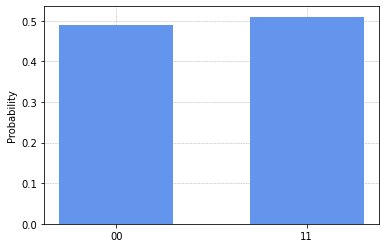

In [49]:
plot_grafico_de_barras(re)